<a href="https://colab.research.google.com/github/kaushanr/ml-notes-n-projects/blob/main/CH_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In [2]:
# Fetching MNIST

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)
mnist.keys() # returns the keys items in the mnist dictionary

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

<class 'pandas.core.frame.DataFrame'>
(70000, 784)
(70000,)


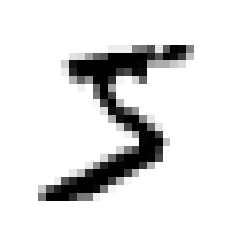

<class 'str'>
<class 'numpy.uint8'>
Label : 5


In [4]:
import numpy as np

X,y = mnist['data'],mnist['target'] # mnist['data'] - returns a pandas.dataFrame, mnist['target'] - returns a pandas.Series
print(type(X))
print(X.shape)
print(y.shape) # np.shape - returns the shape of an array

  # consists of 784 input features that arise from a 28 by 28 pixel image

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X[:1]) # converts the pandas datastructure to a numpy array and extract the first instance
                             # pandas datastructure indexing starts with 1
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()
label = y[0] # returns a string in this dataset instance
print(type(label))
label = y.astype(np.uint8)[0] # converting to np.uint8 - range 0 to 255 - since small single digit numbers are used
print(type(label))
print(f'Label : {label}')

In [5]:
# Training a binary classifier

y = y.astype(np.uint8) # converts all the string labels to uint8 

X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5) # converting the entire dataset labels to True / False labels for 5

# SGD Classifier

    # Stochastic Gradient Descent 
    # capable of handling very large datasets efficiently
    # deals with training instances independantly - hence well suited for online learning

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [ ]:
from random import randint

ind = randint(0,10000)

some_digit = np.array(X_test.iloc[ind]) # .loc[] - label based location, .iloc[] - index based location
#print(some_digit)
some_digit = some_digit.reshape(1,784)
print(f'Label : {y_test.iloc[ind]}')
prediction = sgd_clf.predict(some_digit)[0]
print(f'Prediction : {prediction}')

Label : 2
Prediction : False


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Performance Evaluation

  # evaluating classifiers is more challenging compared to regressors - cannot use the typical RMSE
  # in cross validation the algorithm chooses a random fold to be the test set for evaluation and
  # trains the model on the remaining folds.
  # this process is repeated each time for n = no of folds

# Cross Validation (Custom Implementation)

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42,shuffle=True)

for train_index,test_index in skfolds.split(X_train,y_train_5): # splits the complete data into 3 folds containing all indexes
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train_5.iloc[train_index]
  X_test_fold = X_train.iloc[test_index]
  y_test_fold = y_train_5.iloc[test_index]

  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))

# using the inbuilt cross_val_score()

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

0.9669
0.91625
0.96785


array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):

  def fit(self,X,y=None):
    return self

  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool) # the predict method when called will output False for the entire length of the test set passed into it

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

  # accuracy is not the best performance metric when dealing with skewed  datasets where some classes are much more frequent over others

array([0.91125, 0.90855, 0.90915])

In [ ]:
# Confusion Matrix

  # counts the number of times instances of class A were classified as instances of class B

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3) # performs k-fold cross-validation as well
                                                                 # returns predictions made on each test fold

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train_5,y_train_pred))

  # each row in the confusion matrix represents an actual class
  # each column represents a predicted class
  # in an ideal prediction model the main diagonal will be mathced one to one and the other index postions will be zero

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

[[53892   687]
 [ 1891  3530]]


array([[54579,     0],
       [    0,  5421]])

In [ ]:
# Precision and Recall

  # precision - the accuracy of the true positives
                # TP / TP + FP

  # recall - ratio of positive instances correctly detected by the classifier
              # TP / TP + FN

from sklearn.metrics import precision_score,recall_score

print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

  # example for precision and recall

    # Precision

      # high precision and low recall necessary for an online content filtering application that filters age appropriate content
      # (positive instance = good video) (negative instance = bad video)
      # in this case, having high precision means - TP/(TP+FP) - the cases where negative instances are incorrectly 
      # categorized as postives are low - low false positive instances
      # having low recall means - TP(TP+FN) - the cases where postive instances are incorrectly categorized as negative are high
      # high false negative instances
      # ideaology is, that it is better for such a filter to reject more good videos as bad videos than having more bad videos be
      # labeled as good videos

    # Recall

      # low precision and high recall necessary for a surveillance camera detecting shoplifters in a mall 
      # (positive instance = shoplifter) (negative instance = normal customer)
      # in this case, having low precision means, the cases where negative instances are incorrectly categorized as positives are high
      # having high recall means, the cases where positive instances are incorrectly categorized as negative are low
      # ideology is, that it is better for a surveillance camera to suspect more people as being shoplifters based on their behaviours
      # so that a security team can be alerted to checkup on them. In this way it will be more inconveniant as more people need to 
      # intercepted, but it ensures that a majority of true positives are detained.

0.8370879772350012
0.6511713705958311


In [ ]:
# F1 Score

  # combines precision and recall into a single score
  # represents the harmonic mean of precision and recall
  # regular mean - treats all values equally
  # harmonic mean - gives more weight to low values

  # clasifier will only get a high F1 score if both precision and recall are high

  # F1 = TP/{TP + ([FN + FP]/2)}

from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [ ]:
# Precision/Recall Trade-off

  # increasing precision reduces recall, and vice versa
  # SK-Learn does not give access to the decision boundaries that decide between precision and recall bias

  # use SK-Learns decision scores and make predictions using your own threshold

y_scores = sgd_clf.decision_function(some_digit)
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

  # SGDClassifier uses threshold = 0

threshold = 8000 # the higher threshold results in a lower recall and higher precision - only clearly written 5's detected
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

# How to decide which threshold to use? 

y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function') # return the prediction scores from cross_validation



[-10832.9307329]
[False]
[False]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


(60000,)


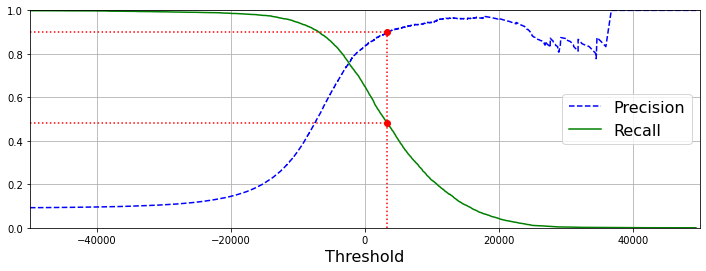

In [ ]:
print(y_scores.shape)

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)
    # generates precisions,recalls for all possible values of thresholds
    # as threshold values are increased from -5000 to 5000, the precision and recall values change accordingly

def plot_precision_recall_vs_threshold(precisions=precisions,recalls=recalls,thresholds=thresholds):
  plt.plot(thresholds,precisions[:-1],"b--",label='Precision') # precision vs threshold - len(precisions[:-1]) = len(thresholds)  
  plt.plot(thresholds,recalls[:-1],"g-",label='Recall') # recall vs threshold
  plt.legend(loc="center right", fontsize=16) # legend location/size
  plt.xlabel("Threshold", fontsize=16)        
  plt.grid()                                  # default = True
  plt.axis([-50000, 50000, 0, 1])             # [xmin,xmax,ymin,ymax]

  # np.argmax - returns indices of the max element of the array in a particular axis
  # np.argmax(precisions >= 0.90) - returns the index of the first True value where precisions >= 90%

recall_90_precision = recalls[np.argmax(precisions >= 0.90)] # recall for 90% precision
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # threshold for 90% precision

plt.figure(figsize=(12, 4))   

plot_precision_recall_vs_threshold()

plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")     # vertical line - [x_start,x_end],[y_start,y_end]
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                    # horizontal line - [x_start,x_end],[y_start,y_end]
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                 # red marker on precision line at 0.9
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                 # red marker on recall line 

plt.show()

  # precision curve is noisier than recall curve, since sometimes under specific cases
  # as the threshold increases, there can be occasional drops in precision, since 
  # (TP + FP) increase as some TP cases are dropped leaving more FP cases, hence TP/(TP+FP) drops
  # but at very high threshold values, the precision generally increases sharply 

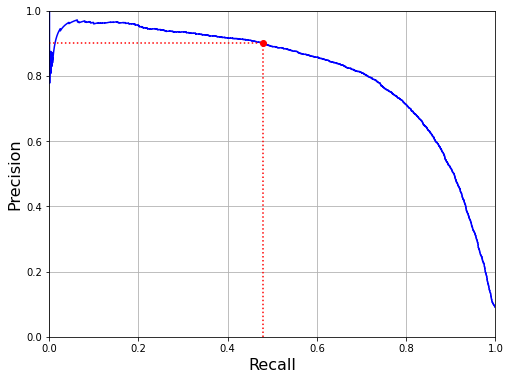

Precision Score @ 90% Precision : 0.9000345901072293
Recall Score @ 90% Precision : 0.4799852425751706


In [ ]:
# Precision vs recall

plt.figure(figsize=(8, 6))   
plt.plot(recalls,precisions,"b-")
plt.xlabel('Recall',fontsize=16)
plt.ylabel('Precision',fontsize=16)
plt.grid()

plt.plot([0, recall_90_precision],[0.9,0.9], "r:") # horizontal line
plt.plot([recall_90_precision, recall_90_precision],[0,0.9], "r:") # vertical line
plt.plot([recall_90_precision], [0.9], "ro")  # point marker
plt.axis([0,1, 0, 1]) 

plt.show()

# Making predictions on the custom threshold model

y_train_pred_90 = (y_scores >= threshold_90_precision)
print(f'Precision Score @ 90% Precision : {precision_score(y_train_5,y_train_pred_90)}')
print(f'Recall Score @ 90% Precision : {recall_score(y_train_5,y_train_pred_90)}')

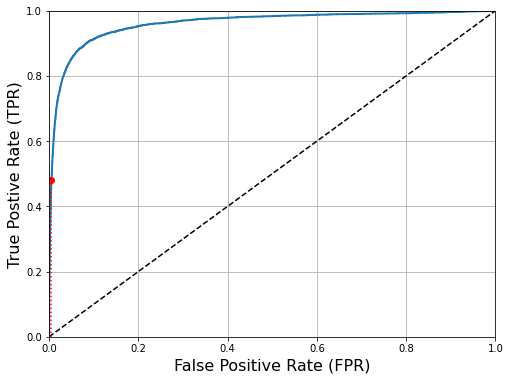

AUC : 0.9604938554008616


In [ ]:
# Receiver Operating Characteristic (ROC curve)

  # typically used with binary classifiers
  # plots True Positive Rate (Recall) Vs False Positive Rate
  # TPR - ratio of postive instances correctly classified as postive
  # FPR - ratio of negative instances incorrectly classified as positive - [1 - TNR]
  # TNR - ratio of negative instances correctly classified  as negative - specificity

from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

fpr_recall_90 = fpr[np.argmax(tpr==recall_90_precision)]

def plot_roc_curve(fpr,tpr,label,*args):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],"k--")
  plt.xlabel('False Positive Rate (FPR)',fontsize=16)
  plt.ylabel('True Postive Rate (TPR)',fontsize=16)
  plt.plot([args[0], args[0]],[0,args[1]], "r:") # vertical line
  plt.plot([args[0]], [args[1]], "ro")  # point marker
  plt.grid()
  plt.axis([0,1, 0, 1]) 
  

plt.figure(figsize=(8, 6))   
plot_roc_curve(fpr,tpr,None,fpr_recall_90,recall_90_precision)
plt.show()

  # as the TPR(recall) increases, the FPR increases
  # low recall - produces more false negatives - more positive instances categorized as negative
  # high recall - produces less false negatives - less positive instances categorized as negative
  # high FPR - produces more negative instances incorrectly classified as positive

  # dotted line represents the ROC of a purely random classifier, a good classifier stays far away from this line
  # towards the top left corner

# AUC - area under the curve

  # a perfect classifier has AUC = 1
  # a random classifier has AUC = 0.5

from sklearn.metrics import roc_auc_score

print(f'AUC : {roc_auc_score(y_train_5,y_scores)}')

# Use Cases

  # PR Curve Vs ROC Curve - use the PR curve whenever the positive class is rare or when precision weighs over recall
      

In [ ]:
# Comparing RandomForestClassifier vs SGDClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

  # RandomForestClassifier does not have a decision_function() method, use the predict_proba() method instead
  # predict_proba() - returns an array containing a row per instance, and column per class
                      # each element contains the probability that the given element belongs to the given class


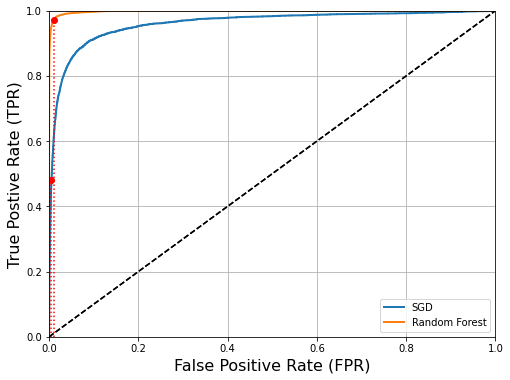

AUC_SGD : 0.9604938554008616
AUC_forest : 0.9983436731328145


In [ ]:
y_scores_forest = y_probas_forest[:,1] # taking the second column results of the array belonging to the positive ('is 5') class

fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores_forest)
tpr_forest_precision_90 = recalls[np.argmax(precisions >= 0.90)] # recall for 90% precision
fpr_forest_recall_90 = fpr_forest[np.argmax(tpr_forest>=tpr_forest_precision_90)]


plt.figure(figsize=(8, 6))
plot_roc_curve(fpr,tpr,'SGD',fpr_recall_90,recall_90_precision)
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest',fpr_forest_recall_90,tpr_forest_precision_90)
plt.grid()
plt.legend(loc='lower right')
plt.show()

  # the random forest classifier is superior to the SGD, since it is closer to the top left corner 
  # and has a higher AUC

print(f'AUC_SGD : {roc_auc_score(y_train_5,y_scores)}\nAUC_forest : {roc_auc_score(y_train_5,y_scores_forest)}')

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(f'Precision_forest : {precision_score(y_train_5,y_train_pred_forest)}')
print(f'Recall_forest : {recall_score(y_train_5,y_train_pred_forest)}')

Precision_forest : 0.9905083315756169
Recall_forest : 0.8662608374838591


In [ ]:
# Multiclass Classification

  # SGD,Random Forest,naive Bayes - can handle multiclass natively
  # Logistic Regression, SVM - strictly binary classifiers only (can use multiple binary classifiers)

  # One Vs the Rest (OvR) strategy 
    # train n classifiers on n classes
    # get the decision score from each  classifier for each instance
    # select the class whose classifier outputs the highest score

  # One Vs One (OvO) strategy
    # train a binary classifier for every pair of classes
    # for n classes, need to train n*(n-1)/2 classifiers
    # advantage of OVO, each classiifier only needs to be trained on the two class instances

  # SVMs scale poorly with the size of the training set, hence OVO is prefered, since it is faster
  # to train many classifiers on small training sets than to train few classifiers on large training sets

  # SK-Learn automatically detects when binary classification algorithm is being used for a 
  # multi-class classification task and automatically selects between OvR and OvO

from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train,y_train)

svm_clf.predict(some_digit)

  # here SK-Learn uses the OvO strategy internally, 45 binary classifiers are trained for the 10 classes
  # in the dataset, the decision scores from each classifier is obtained and the class with the highest output
  # is selected

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([5], dtype=uint8)

In [ ]:
some_digit_scores = svm_clf.decision_function(some_digit)
print(some_digit_scores) # shows the scores output for each class
print(some_digit_scores.shape)

print(np.argmax(some_digit_scores))
print(svm_clf.classes_)

  # when a classifier is trained, it stores the list of target classes in its 
  # classes_ attribute, ordered by value

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
(1, 10)
5
[0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Forcing SK-Learn to use OvR / OvO

from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC()) # passing the classifier to the class instance's constructor
ovr_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packa

10

In [ ]:
print(ovr_clf.predict(some_digit))
len(ovr_clf.estimators_) # .estimators_ - returns the number of classifiers used

[5]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packa

10

In [6]:
# Training a SGDClassifier

sgd_clf.fit(X_train,y_train) # does not run OvR/OvO since SGD can directly classify multiclasses
print(sgd_clf.predict(some_digit))
print(sgd_clf.decision_function(some_digit))

  # evaluating the classifier using cross-validation

from sklearn.model_selection import cross_val_score

results = cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')
print(results)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64)) # standardizing the data across a range
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


[3]
[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]
[0.87365 0.85835 0.8689 ]


array([0.8983, 0.891 , 0.9018])

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


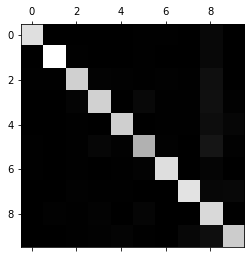

In [7]:
# Error Analysis

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
print(conf_mx)

plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()


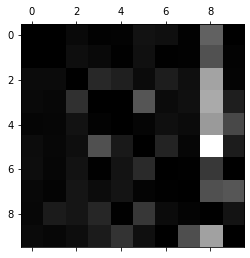

In [10]:
row_sums = conf_mx.sum(axis=1,keepdims=True) # summing the contents of each row to obtain the total instances per class
norm_conf_mx = conf_mx/row_sums # normalizing the confusion matrix

np.fill_diagonal(norm_conf_mx,0) # fill the diaogonal with zeros to only make the errors visible
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

  # plot shows many instances of other classes get incorrectly classified as '8'.
  # more training examples could be added on that class to improve performance
  # engineer new features - count closed loops - 8 has 2, 6 has 1, 4 has 1
  # do image preprocessing using Scikit-Image, Pillow, OpenCV to make patterns stand out

In [109]:
from matplotlib.pyplot import imshow

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size)) # makes an array in array
    print(image_grid.shape)

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    print(image_grid.transpose(0, 2, 1, 3).shape)
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,images_per_row * size) 
    print(big_image.shape) # repositioning elements using transpose
    
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

(1, 2, 28, 28)
(1, 28, 2, 28)
(28, 56)


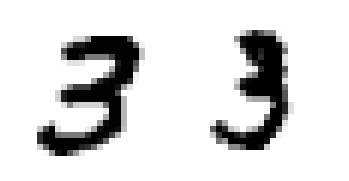

In [115]:
plot_digits(X_aa[:2], images_per_row=5)

(5, 5, 28, 28)
(140, 140)
(5, 5, 28, 28)
(140, 140)
(5, 5, 28, 28)
(140, 140)
(5, 5, 28, 28)
(140, 140)


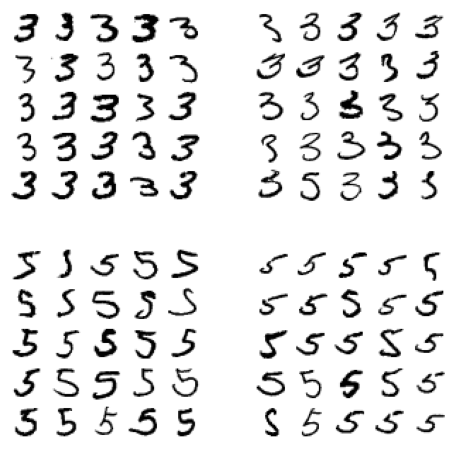

In [96]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
#save_fig("error_analysis_digits_plot")
plt.show()

In [127]:
# Multilabel Classification

  # classifier outputs multiple classes per instance - each class has two possible values - binary

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd] # np.c_ - array concatenation along second axis - [[0,0],[0,1],[...]]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

print(knn_clf.predict(some_digit)) # 5 - is not larger than 7, is an odd number
print(f'Label : {y_train[0]}')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


[[False  True]]
Label : 5


In [129]:
# Metrics

y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)

from sklearn.metrics import f1_score

print(f1_score(y_multilabel,y_train_knn_pred,average='macro')) # macro - assumes all labels are equally important
print(f1_score(y_multilabel,y_train_knn_pred,average='weighted')) # weighted - gives each label a weight equal to its support
                                                                  # support - the number of instances with that target label

  # fewer instances in the dataset consist of numbers >= 7, hence the true instances in that set are smaller
  # more instances in the dataset consist of odd numbers, hence the true instances in that set are larger
  # the f1 score improves here because, 

0.976410265560605
0.9778357403921755


In [144]:
from sklearn.metrics import precision_score,recall_score,f1_score

from sklearn.metrics import confusion_matrix

y_true = [True,True,False,True,True]
y_pred = [True,True,False,True,False]

print(confusion_matrix(y_true,y_pred))

print(precision_score(y_true, y_pred))
print(precision_score(y_true, y_pred,average='macro'))
print(recall_score(y_true, y_pred))
print(recall_score(y_true, y_pred,average='macro'))
print(f1_score(y_true, y_pred, average='macro'))

    # learn more about macro average and weighted average precision,recall and fl-scores from the link below
    # macro - precision,recall,f1-scores on each class is calculated and averaged out
    # https://towardsdatascience.com/precision-recall-and-f1-score-of-multiclass-classification-learn-in-depth-6c194b217629

[[1 0]
 [1 3]]
1.0
0.75
0.75
0.875
0.7619047619047619


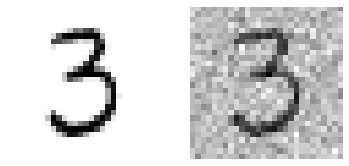

In [178]:
# Multioutput Classification

  # generalization of multilabel classification where each label can be multiclass
  # label has more than two possible values

# System that takes a noisy image and outputs a clean image

  # classifiers output is multilabel - one lable per pixel
  # each label can have multiple values - pixel intensities (0-255)

import cv2 

def noisy(image): # adds gaussian noise to all images
  row,col = image.shape
  mean = 0
  var = 2000
  sigma = var**0.5
  gauss = np.random.normal(mean,sigma,(row,col))
  gauss = gauss.reshape(row,col)
  noisy = image + gauss
  return noisy

# the noise filled training/test images

train_X = np.array(X_train)

noise_X_train = noisy(train_X)
noise_X_test = noisy(np.array(X_test))

# the noise removed original training/test image labels

y_train_mod = np.array(X_train)
y_test_mod = np.array(X_test)

# input and output images being fed into classifier for training

input_img = y_train_mod[50].reshape(28,28)
output_img = noise_X_train[50].reshape(28,28)

plt.subplot(121); plt.imshow(input_img,cmap='binary'); plt.axis('off')
plt.subplot(122); plt.imshow(output_img,cmap='binary'); plt.axis('off')
plt.show()

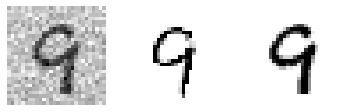

In [183]:
# Training the classifier to get filtered images

knn_clf.fit(noise_X_train,y_train_mod)

digit = 150

clean_digit = knn_clf.predict([noise_X_test[digit]])

plt.subplot(131); plt.imshow(noise_X_test[digit].reshape(28,28),cmap='binary'); plt.axis('off') # noise contaminated input image
plt.subplot(132); plt.imshow(clean_digit.reshape(28,28),cmap='binary'); plt.axis('off') # predicted noise removed image
plt.subplot(133); plt.imshow(y_test_mod[digit].reshape(28,28),cmap='binary'); plt.axis('off') # actual non-contaminated image

plt.show()